[View in Colaboratory](https://colab.research.google.com/github/tiwari-abhi/ADS_FALL2018/blob/master/Data%20Visualization/Data_Visualization_Assignment.ipynb)

## **INFO 7390 - Data Visualization Assignment**

**We import all necessary libraries that will be used in our evaluations :**

In [4]:
!pip install cufflinks
import numpy as np
import pandas as pd
import plotly.plotly as py
import seaborn as sn
import matplotlib.pyplot as plt
import cufflinks as cf

from dateutil.parser import parser as par
from datetime import datetime as dt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Warning for setting with copies/views
pd.options.mode.chained_assignment = None

init_notebook_mode(connected=False)
cf.go_offline()
%matplotlib inline

    100% |████████████████████████████████| 71kB 2.4MB/s 
    100% |████████████████████████████████| 37.3MB 488kB/s 
    100% |████████████████████████████████| 163kB 21.6MB/s 
    100% |████████████████████████████████| 112kB 29.1MB/s 
    100% |████████████████████████████████| 2.2MB 1.2MB/s 
  Running setup.py bdist_wheel for cufflinks ... - \ done
  Stored in directory: /root/.cache/pip/wheels/7b/5a/98/30259388b784d11af96230b6f843add608d8f845d2048e54ba
  Running setup.py bdist_wheel for colorlover ... - done
  Stored in directory: /root/.cache/pip/wheels/fc/c3/f7/fde32e0d906ad64fe8011a823ea39e0197616116150f4a8376
  Running setup.py bdist_wheel for retrying ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built cufflinks colorlover retrying
  Found existing installation: plotly 1.12.12
    Uninstalling plotly-1.12.12:
      Successfully uninstalled plotly-1.12.12


ImportError: ignored

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

**Importing the data from the CSV File**

In [0]:
gun = pd.read_csv('https://s3.us-east-2.amazonaws.com/ads-demo1/gun-violence-data_01-2013_03-2018.csv')

**Describing the columns from the dataframe**

In [0]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

**Summary Statistics**

In [0]:
gun.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


**Top 20 States with most number of incidents**  
Here we find out the states that have the most number of incidents by incident id

In [7]:
configure_plotly_browser_state()
state_bar = gun['state'].value_counts().head(20)
state_bar.iplot(kind='bar',colors='red',title='Top 20 States by Most Number of Incidents',xTitle='States',yTitle='No of Incidents')

**Top 20 cities with most number of incidents**  
We further drill down to find out the top 20 cities by most number of incidents

In [9]:
configure_plotly_browser_state()
city_bar = gun['city_or_county'].value_counts().head(20)
city_bar.iplot(kind='bar',colors='blue',title='Top 20 cities with most number of incidents',xTitle='Cities',yTitle='No of Incidents')

**Top States by Number of People Affected**  
Here plot the states that have the most number of people that were affected by the sum of all incidents in that states

In [0]:
gun['Total'] = gun['n_killed'] + gun['n_injured']

In [11]:
configure_plotly_browser_state()
st = gun.groupby('state')['state','Total'].sum().sort_values('Total',ascending=False).head(20)
st.iplot(kind='bar',colors='green',title='Top 20 States by Number of People Killed & Injured',xTitle='States',yTitle='Killed + Injured')

**Top 20 Cities by Number of People Affected**  
Here we plot the cities that have the most number of people that were affected by the sum of all incidents in that city

In [12]:
configure_plotly_browser_state()
ki = gun.groupby('city_or_county')['city_or_county','Total'].sum().sort_values('Total',ascending=False).head(20)
ki.iplot(kind='bar',colors='Black',title='Top 20 Cities by Number of People Killed + Injured',xTitle='Cities',yTitle='Killed + Injured')

**Total Number of Incidents categorized by number of guns involved**  
Here we have segregated the the total number of incidents based on the number of guns that were involved in the incident

In [13]:
configure_plotly_browser_state()
gun['n_guns'] = gun['n_guns_involved'].apply(lambda x : '4 >' if x > 4 else str(x))
g = gun['n_guns'].value_counts().reset_index()
g = g[g['index'] != 'nan']

labels = list(g['index'])
values = list(g['n_guns'])

tr1 = go.Pie(labels=labels,values=values,marker=dict(colors = ['Grey','Yellow','Purple','Green','Orange']))
layout = dict(height=500, title='Number of Guns Utilized', legend=dict(orientation="v"))
f = go.Figure(data=[tr1], layout=layout)
iplot(f)

In [0]:
#Code to fetch number of males and females along with totals
def extract(a):
    a = a.split('||')
    a  = [x.replace('::','-') for x in a]
    a =  [(x.split('-')) for x in a]
    y = []
    for  i in range (0, len(a)):
        y.append(a[i][-1])
    return(y)  
gun['participant_gender'] = gun['participant_gender'].fillna("0::Zero")
gun['gender'] = gun['participant_gender'].apply(lambda x: extract(x))
gun['Males'] = gun['gender'].apply(lambda x: x.count('Male'))
gun['Females'] = gun['gender'].apply(lambda x: x.count('Female'))
gun['Total Participants'] = gun['Males'] + gun['Females']

In [15]:
#Female and Male Killers by State
configure_plotly_browser_state()
gender = gun[['state','Males','Females']].groupby('state').sum().sort_values(by='Males',ascending=False)
gender = gender.reset_index().set_index(keys='state')
gender.iplot(kind='bar',colors=['Black','Green'],title='Female and Males Killers by State',xTitle='State',yTitle='No of Killers')

**Time Based Analysis**  
In this section we find out the Day, Month and Year which had the most number of incidents

In [0]:
gun['datetime'] = gun['date'].apply(pd.to_datetime)

In [0]:
t = gun[['n_killed','n_injured','datetime']]

In [0]:
day = {0:'Monday',1:'Tueday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
month = {1 :"Jan",2 :"Feb",3 :"Mar",4 :"Apr",5 : "May",6 : "Jun",7 : "Jul",8 :"Aug",9 :"Sep",10 :"Oct",11 :"Nov",12 :"Dec"}

t['year'] = t['datetime'].dt.year
t['month'] = t['datetime'].dt.month.map(month)
t['day'] = t['datetime'].dt.dayofweek.map(day)

In [20]:
configure_plotly_browser_state()
year = t[['year','n_killed','n_injured']].groupby('year').sum()
year.iplot(kind='line',mode='markers+lines',colors=['Black','Blue'],xTitle='Year',yTitle='Num of People Affected')

In [21]:
configure_plotly_browser_state()
month = t[['month','n_killed','n_injured']].groupby('month').sum().sort_values(by='n_killed',ascending=False)
month.iplot(kind='line', mode= 'markers+lines',colors=['Black','Blue'],xTitle='Month',yTitle='Num of People Affected')

In [22]:
configure_plotly_browser_state()
day = t[['day','n_killed','n_injured']].groupby('day').sum().sort_values(by='n_killed',ascending=False)
day.iplot(kind='line',mode='markers+lines',colors=['Black','Blue'],xTitle='Day',yTitle='Num of People Affected')

**Correlation Analysis**  
This section depicts the correlation between the different features of the data which helps us decide if there are any redundant columns that can be dropped from the analysis

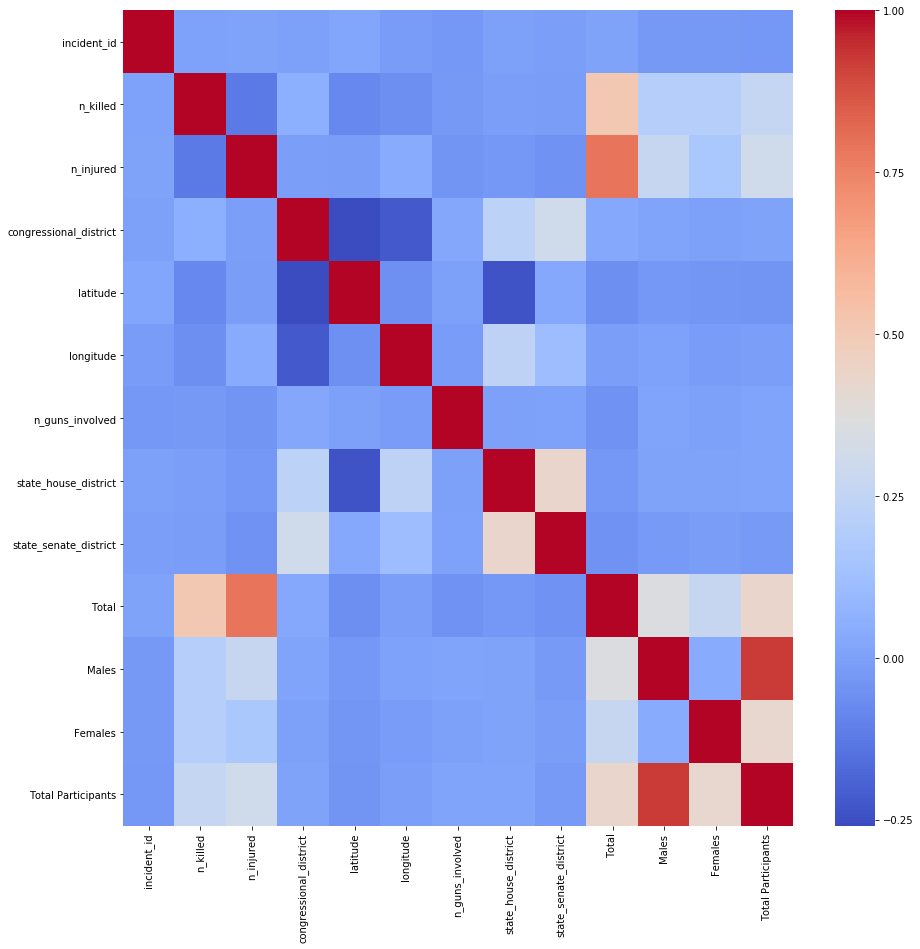

In [0]:
plt.figure(figsize=(15,15))
sn.heatmap(gun.drop('incident_url_fields_missing',axis=1).corr(),cmap='coolwarm')

**Summary from the EDA**

- Illinois is the state with the most number of incidents and Chicago is the city with the most number of incidents.
- Most of the incidents that occured just had a single weapon that was involved.
- The most number of Male perpetrators are from Illinois and the number of Female perpetrators are from Texas.
- The steepest rise in the number of incidents was in the year 2013-2014.
- The most significant number of deaths occured in the month of Jan and injuries were highest in July.
- The most number of incidents occured on a Sunday, making it the most dangerous day.